In [11]:
import numpy as np
np.random.seed(10)
import tensorflow as tf
tf.random.set_seed(10)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
import matplotlib.pyplot as plt

In [12]:
from pickle import dump

In [26]:
directory = '/lus/grand/projects/datascience/bethanyl/AIEADA/snapshots/'
example = np.load(directory + 'split_examples/train_data_z500_2d/example_151.npy')

In [27]:
print(example.shape)
print(np.max(example))
print(np.min(example))

(21, 121, 281)
0.944623
0.58532333


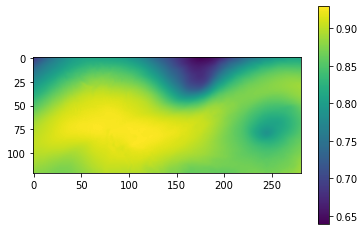

In [28]:
plt.imshow(example[10,:,:])
plt.colorbar()

In [16]:
# In physical space use 'raw_train.reshape(-1,121,281)' to visualize original
num_snapshots = 12564
#directory = '/lcrc/project/AIEADA-2/era5_data/full_data/snapshots/'
directory = '/lus/grand/projects/datascience/bethanyl/AIEADA/snapshots/'
raw_train_z500 = np.load(directory + 'train_z500_snap.npy')
print(raw_train_z500.shape)

(12564, 34001)


In [17]:
temp = raw_train_z500.reshape(-1,121,281)

(121, 281)
57748.68
50164.055


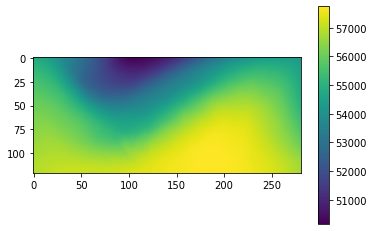

In [18]:
example = temp[0,:,:]
print(example.shape)
print(np.max(example))
print(np.min(example))
plt.imshow(example)
plt.colorbar()
del temp

In [19]:
raw_train_z500_flattened = np.reshape(raw_train_z500, (-1, 1))
del raw_train_z500
print(raw_train_z500_flattened.shape)

#MinMaxScaler expects data of shape (n_samples, n_features). Scales & translates each feature so that between 0 and 1
scaler = MinMaxScaler()
scaled_train_z500 = scaler.fit_transform(raw_train_z500_flattened)
del raw_train_z500_flattened
scaled_train = scaled_train_z500.reshape(-1,121,281)
del scaled_train_z500

(427188564, 1)


(121, 281)
0.9051776
0.31130886


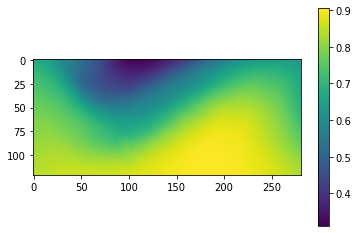

In [20]:
example = scaled_train[0,:,:]
print(example.shape)
print(np.max(example))
print(np.min(example))
plt.imshow(example)
plt.colorbar()

In [21]:
print(scaled_train.shape)

(12564, 121, 281)


In [22]:
input_window = 14
output_window = 7

train_inputs = []
train_outputs = []

i = 0
while i < scaled_train.shape[0] - input_window - output_window:
    train_inputs.append(scaled_train[i:i+input_window])
    train_outputs.append(scaled_train[i+input_window:i+input_window+output_window])
    i = i + 1
    
del scaled_train
    
train_inputs = np.asarray(train_inputs)
train_outputs = np.asarray(train_outputs)

In [23]:
onegb = 1000000000
gb_train_inputs = train_inputs.nbytes/onegb
gb_train_outputs = train_outputs.nbytes/onegb
print(gb_train_inputs)
print(train_inputs.shape)
print(gb_train_outputs)
print(train_outputs.shape)

23.882574408
(12543, 14, 121, 281)
11.941287204
(12543, 7, 121, 281)


## This is a lot of data to fit into memory, so let's save it to files and later use TensorFlow data pipelines to load it as needed

In [24]:
train_dir = directory + "split_examples/train_data_z500_2d/"
for i in range(train_inputs.shape[0]):
    example_input = train_inputs[i,:,:,:]
    example_output = train_outputs[i,:,:,:]
    example = np.concatenate([example_input, example_output],axis=0)
    np.save(train_dir + "example_%d.npy" % i, example)

In [25]:
dump(scaler, open(directory + '/split_examples/scaler_z500.pkl', 'wb'))